## Mô tả

Notebook này thực hiện phân tích dữ liệu khám phá (EDA) trên bộ dữ liệu Bank Churners nhằm hiểu rõ đặc điểm khách hàng và các yếu tố liên quan đến khả năng rời đi (churn).

### Chuẩn bị dữ liệu
- Đọc dữ liệu từ file CSV.
- Chuẩn hóa dữ liệu ký tự, tách tên cột và dữ liệu.
- Gán nhãn biến mục tiêu `Attrition_Flag`.

### Phân tích đặc trưng đơn biến và nhãn
- Phân bố nhãn churn (Attrited vs Existing Customer).  
- Phân bố độ tuổi khách hàng.  
- Phân tích tỉ lệ churn theo giới tính và theo nhóm thu nhập.

### Phân tích hành vi sử dụng thẻ
- Tỉ lệ churn theo số lượng giao dịch (`Total_Trans_Ct`).  
- Ảnh hưởng của hạn mức tín dụng (`Credit_Limit`).  
- Số lượng mối quan hệ với ngân hàng (`Total_Relationship_Count`).  
- Mức thay đổi số lượng giao dịch (Q4–Q1).  
- Số tháng không hoạt động trong 12 tháng gần nhất.

### Phân tích tương quan giữa các đặc trưng số
- Heatmap hiển thị mối tương quan giữa các biến hành vi và tài chính.

## Chuẩn bị dữ liệu

### Import thư viện

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Đọc file

In [3]:
raw = np.genfromtxt(
    "../data/raw/BankChurners.csv",
    delimiter=",",
    dtype=str
)

### Chuẩn hóa dữ liệu
Loại bỏ khoảng trắng và kí tự " thừa

In [4]:
raw = np.char.strip(raw)          # bỏ space
raw = np.char.strip(raw, '"')     # bỏ ký tự "

### Tách tên cột và dữ liệu

In [5]:
header = raw[0]      # mảng tên cột
data = raw[1:]       # phần dữ liệu

In [6]:
print("Shape data:", data.shape)

Shape data: (10127, 23)


In [7]:
# Ánh xạ tên cột và chỉ số cột để thuận tiện hơn
col_idx = {name: i for i, name in enumerate(header)}
col_idx

{'CLIENTNUM': 0,
 'Attrition_Flag': 1,
 'Customer_Age': 2,
 'Gender': 3,
 'Dependent_count': 4,
 'Education_Level': 5,
 'Marital_Status': 6,
 'Income_Category': 7,
 'Card_Category': 8,
 'Months_on_book': 9,
 'Total_Relationship_Count': 10,
 'Months_Inactive_12_mon': 11,
 'Contacts_Count_12_mon': 12,
 'Credit_Limit': 13,
 'Total_Revolving_Bal': 14,
 'Avg_Open_To_Buy': 15,
 'Total_Amt_Chng_Q4_Q1': 16,
 'Total_Trans_Amt': 17,
 'Total_Trans_Ct': 18,
 'Total_Ct_Chng_Q4_Q1': 19,
 'Avg_Utilization_Ratio': 20,
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 21,
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 22}

### Gắn nhãn cho dữ liệu

In [8]:
y = np.where(data[:,col_idx["Attrition_Flag"]] == "Attrited Customer", 1, 0)
y

array([0, 0, 0, ..., 1, 1, 1])

## Khám phá dữ liệu

### Q1. Phân bố nhãn Attrition_Flag

Câu hỏi:  
> Tỉ lệ khách hàng rời đi (Attrited Customer) so với đang hoạt động (Existing Customer) là bao nhiêu? Dữ liệu có bị lệch không?

Tỉ lệ rời đi: 16.065962279055988


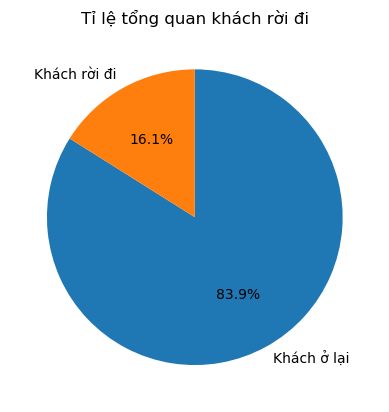

In [9]:
churn_rate = y.mean() * 100
print("Tỉ lệ rời đi:", churn_rate)

labels = ["Khách ở lại", "Khách rời đi"]
sizes = [100 - churn_rate, churn_rate]

plt.pie(
    sizes, 
    labels=labels, 
    autopct="%1.1f%%", 
    startangle=90, 
    counterclock=False
)
plt.title("Tỉ lệ tổng quan khách rời đi")
plt.show()

**Nhận xét:**

- Tỉ lệ khách hàng rời đi khoảng 16.07%, đa số khách hàng trong dữ liệu vẫn đang hoạt động (~84%).  
- Lớp Attrited Customer là lớp thiểu số, dữ liệu bất cân bằng.


### Q2. Phân bố độ tuổi khách hàng (Customer_Age)

Câu hỏi:  
> Độ tuổi khách hàng phân bố như thế nào? Tập trung vào một khoảng tuổi hay trải đều?

Tuổi min: 26
Tuổi max: 73
Tuổi trung bình: 46.33


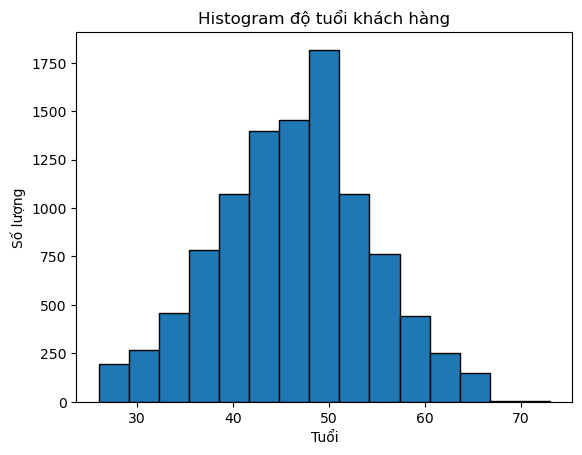

In [10]:
age_col_str = data[:, col_idx["Customer_Age"]]
age = age_col_str.astype(int)

print("Tuổi min:", age.min())
print("Tuổi max:", age.max())
print("Tuổi trung bình:", age.mean().round(2))

plt.hist(age, bins=15, edgecolor="black")
plt.title("Histogram độ tuổi khách hàng")
plt.xlabel("Tuổi")
plt.ylabel("Số lượng")
plt.show()

**Nhận xét:**

- Độ tuổi khách hàng nằm trong khoảng 26–73 tuổi, tuổi trung bình khoảng 46.33, tập khách hàng thiên về trung niên.  
- Histogram cho thấy độ tuổi khách hàng phân bố tập trung nhiều nhất ở khoảng 40–55 tuổi, rất ít khách ở nhóm quá trẻ (<30) hoặc quá lớn tuổi (>65).  

### Q3. Tỉ lệ khách hàng rời đi theo giới tính (Gender)

Câu hỏi:
> Có sự khác biệt đáng kể về tỉ lệ rời đi giữa nam và nữ không?


Giới tính F: Tỉ lệ rời đi 930/5358 = 17.36%
Giới tính M: Tỉ lệ rời đi 697/4769 = 14.62%


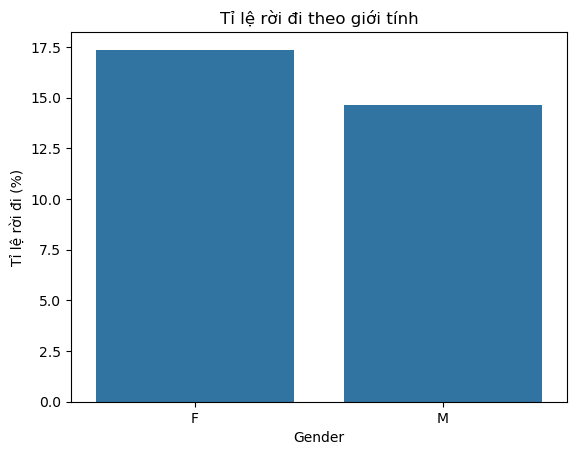

In [11]:
gender_col = data[:, col_idx["Gender"]]              
attr_col   = data[:, col_idx["Attrition_Flag"]]     

genders = np.unique(gender_col)
churn_rates = []

for g in genders:
    mask_g = (gender_col == g)
    total_g = mask_g.sum()
    
    churn_g = np.logical_and(mask_g, attr_col == "Attrited Customer").sum()
    
    rate = churn_g / total_g if total_g > 0 else 0
    churn_rates.append(rate)
    print(f"Giới tính {g}: Tỉ lệ rời đi {churn_g}/{total_g} = {rate*100:.2f}%")

sns.barplot(x=genders, y=np.array(churn_rates)*100)
plt.ylabel("Tỉ lệ rời đi (%)")
plt.xlabel("Gender")
plt.title("Tỉ lệ rời đi theo giới tính")
plt.show()

**Nhận xét:**

- Nữ (F): churn ≈ 17.36%  
- Nam (M): churn ≈ 14.62%

- Cả hai giới đều có tỉ lệ churn quanh mức 15–17%, nhưng khách hàng nữ rời đi nhiều hơn nam một chút.  

### Q4. Tỉ lệ rời đi theo nhóm thu nhập (Income_Category)

Câu hỏi:
> Các nhóm thu nhập khác nhau có tỉ lệ rời đi khác nhau không?


$120K +              | tổng số lượng:  727, Số khách rời đi:  126 (17.33%)
$40K - $60K          | tổng số lượng: 1790, Số khách rời đi:  271 (15.14%)
$60K - $80K          | tổng số lượng: 1402, Số khách rời đi:  189 (13.48%)
$80K - $120K         | tổng số lượng: 1535, Số khách rời đi:  242 (15.77%)
Less than $40K       | tổng số lượng: 3561, Số khách rời đi:  612 (17.19%)
Unknown              | tổng số lượng: 1112, Số khách rời đi:  187 (16.82%)


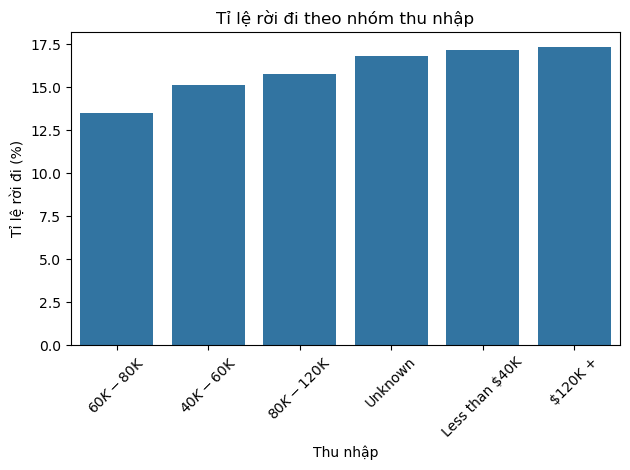

In [42]:
income_col = data[:, col_idx["Income_Category"]]
attr_col   = data[:, col_idx["Attrition_Flag"]]

income_groups = np.unique(income_col)
churn_rates_income = []
counts_income = []

for inc in income_groups:
    mask_inc = (income_col == inc)
    total_inc = mask_inc.sum()
    churn_inc = np.logical_and(mask_inc, attr_col == "Attrited Customer").sum()
    
    rate = churn_inc / total_inc if total_inc > 0 else 0
    churn_rates_income.append(rate)
    counts_income.append(total_inc)
    print(f"{inc:20s} | tổng số lượng: {total_inc:4d}, Số khách rời đi: {churn_inc:4d} ({rate*100:5.2f}%)")

income_groups_sorted = np.array(income_groups)[np.argsort(churn_rates_income)]
churn_sorted = np.sort(churn_rates_income)

sns.barplot(x=income_groups_sorted, y=np.array(churn_sorted)*100)
plt.xticks(rotation=45)
plt.ylabel("Tỉ lệ rời đi (%)")
plt.xlabel("Thu nhập")
plt.title("Tỉ lệ rời đi theo nhóm thu nhập")
plt.tight_layout()
plt.show()

**Nhận xét:**

- Nhìn chung, tỉ lệ rời đi theo thu nhập dao động quanh 13–17%, không chênh lệch quá lớn giữa các nhóm.  
- Nhóm 60K–80K có tỉ lệ rời đi thấp nhất (~13.5%), là nhóm khách hàng ổn định nhất.  
- Hai đầu thu nhập Less than 40K (\~17.2%) và 120K+ (\~17.3%), cùng nhóm Unknown (~16.8%) có tỉ lệ rời đi cao hơn trung bình.


### Q5. Mối quan hệ giữa số lượng giao dịch và tỉ lệ rời đi

Câu hỏi:
> Khách hàng có số lượng giao dịch thấp có tỉ lệ rời đi cao hơn không?


Số lượng giao dịch   0 – 29: 192/614 (31.27%)
Số lượng giao dịch  30 – 59: 1185/3322 (35.67%)
Số lượng giao dịch  60 – 89: 245/4992 ( 4.91%)
Số lượng giao dịch  90 –119: 5/1020 ( 0.49%)
Số lượng giao dịch 120 –199: 0/179 ( 0.00%)


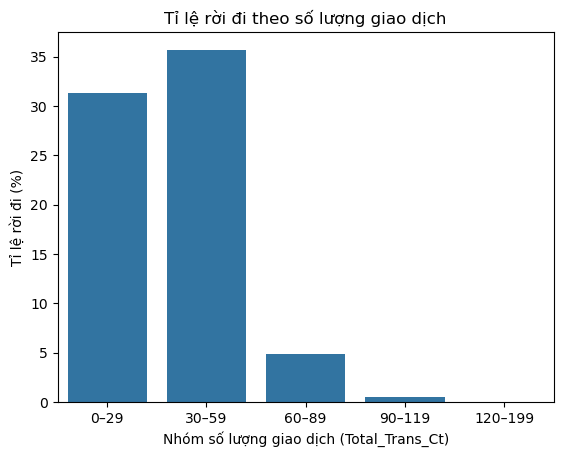

In [34]:
trans_ct_str = data[:, col_idx["Total_Trans_Ct"]]
trans_ct = trans_ct_str.astype(float)
attr_col = data[:, col_idx["Attrition_Flag"]]

# Chia thành bins
bins = [0, 30, 60, 90, 120, 200]
bin_labels = [f"{bins[i]}–{bins[i+1]-1}" for i in range(len(bins)-1)]

churn_rates_bins = []

for i in range(len(bins)-1):
    low, high = bins[i], bins[i+1]
    mask_bin = (trans_ct >= low) & (trans_ct < high)
    total_bin = mask_bin.sum()
    churn_bin = np.logical_and(mask_bin, attr_col == "Attrited Customer").sum()
    
    rate = churn_bin / total_bin if total_bin > 0 else 0
    churn_rates_bins.append(rate)
    print(f"Số lượng giao dịch {low:3.0f} –{high-1:3.0f}: {churn_bin}/{total_bin} ({rate*100:5.2f}%)")

sns.barplot(x=bin_labels, y=np.array(churn_rates_bins)*100)
plt.xlabel("Nhóm số lượng giao dịch (Total_Trans_Ct)")
plt.ylabel("Tỉ lệ rời đi (%)")
plt.title("Tỉ lệ rời đi theo số lượng giao dịch")
plt.show()

**Nhận xét:**

- Nhóm giao dịch ít (0–29, 30–59) có tỉ lệ rời đi rất cao, lần lượt khoảng 31% và 36%. khách ít giao dịch dễ rời đi hơn.
- Khi số giao dịch tăng (60–89, 90–119, 120–199) thì tỉ lệ rời đi giảm cực mạnh, gần như về 0% ở các nhóm giao dịch nhiều.  

### Q6. Heatmap tương quan các đặc trưng số

Câu hỏi:
> Các đặc trưng số như `Total_Trans_Amt`, `Credit_Limit`, `Customer_Age`, `Avg_Utilization_Ratio`... có mối tương quan nào đáng chú ý không? Các đặc trưng nào có tương quan mạnh với nhau?



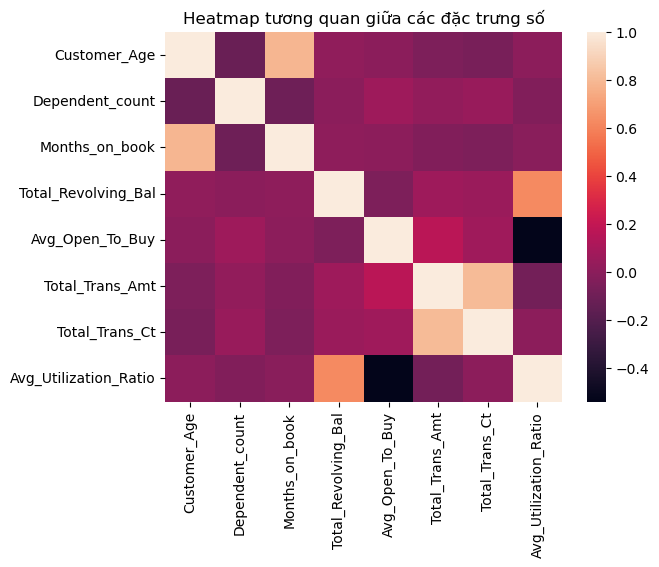

In [12]:
# Chọn vài cột số quan trọng
num_cols = [
    "Customer_Age",
    "Dependent_count",
    "Months_on_book",
    "Total_Revolving_Bal",
    "Avg_Open_To_Buy",
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Avg_Utilization_Ratio"
]

num_data = np.column_stack([
    data[:, col_idx[c]].astype(float)
    for c in num_cols
])

# Tính ma trận tương quan
corr = np.corrcoef(num_data, rowvar=False)

sns.heatmap(corr, annot=False, xticklabels=num_cols, yticklabels=num_cols)
plt.title("Heatmap tương quan giữa các đặc trưng số")
plt.show()

**Nhận xét:**

- Đa số cặp đặc trưng có tương quan yếu (màu tím đậm), ít nguy cơ đa cộng tuyến mạnh.
- Một số cặp tương quan dương tương đối cao:
  - `Total_Trans_Amt` ↔ `Total_Trans_Ct`: số giao dịch nhiều thì tổng số tiền giao dịch cũng cao.
  - `Total_Revolving_Bal` ↔ `Avg_Utilization_Ratio`: dư nợ quay vòng càng lớn thì tỉ lệ sử dụng hạn mức càng cao.
  - `Customer_Age` ↔ `Months_on_book`: khách lớn tuổi thường gắn bó lâu năm hơn.
- Có tương quan âm rõ giữa `Avg_Open_To_Buy` và `Avg_Utilization_Ratio`:  
  hạn mức còn lại để chi tiêu càng thấp thì tỉ lệ sử dụng hạn mức càng cao (hợp lý về mặt nghiệp vụ).

→ Có thể xem `Total_Trans_Amt` và `Total_Trans_Ct` là nhóm đặc trưng gần nhau;  
`Total_Revolving_Bal`, `Avg_Utilization_Ratio`, `Avg_Open_To_Buy` là một nhóm khác liên quan đến hạn mức & sử dụng thẻ.


### Q7. So sánh Credit_Limit giữa khách rời đi và không rời đi

Câu hỏi:
> Khách có hạn mức tín dụng thấp có xu hướng rời đi nhiều hơn không?


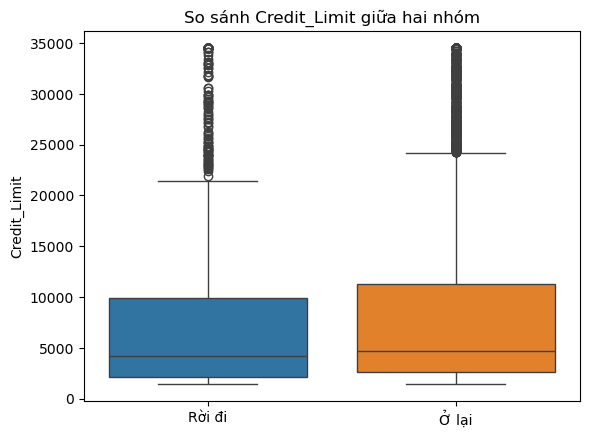

In [31]:
credit = data[:, col_idx["Credit_Limit"]].astype(float)
label = data[:, col_idx["Attrition_Flag"]]

credit_churn     = credit[label == "Attrited Customer"]
credit_nonchurn  = credit[label == "Existing Customer"]

sns.boxplot(data=[credit_churn, credit_nonchurn])
plt.xticks([0,1], ["Rời đi", "Ở lại"])
plt.ylabel("Credit_Limit")
plt.title("So sánh Credit_Limit giữa hai nhóm")
plt.show()

**Nhận xét:**

- Nhóm rời đi có median `Credit_Limit` thấp hơn và phần lớn quan sát nằm ở vùng hạn mức thấp hơn so với nhóm Ở lại.  
- Nhóm Ở lại trải dài tới các hạn mức cao hơn, cho thấy khách có hạn mức tín dụng cao có xu hướng ở lại nhiều hơn.  
- Tuy nhiên hai box vẫn chồng lấn khá nhiều, nên hạn mức tín dụng không phải yếu tố quyết định duy nhất cho tỉ lệ rời đi, mà cần kết hợp với các đặc trưng khác.


### Q8. Ảnh hưởng của Total_Relationship_Count đến tỉ lệ rời đi

Câu hỏi:
> Khách hàng có nhiều mối quan hệ hơn với ngân hàng (nhiều sản phẩm hơn) có rời đi ít hơn không?


1 mối quan hệ: 25.60% rời đi
2 mối quan hệ: 27.84% rời đi
3 mối quan hệ: 17.35% rời đi
4 mối quan hệ: 11.77% rời đi
5 mối quan hệ: 12.00% rời đi
6 mối quan hệ: 10.50% rời đi


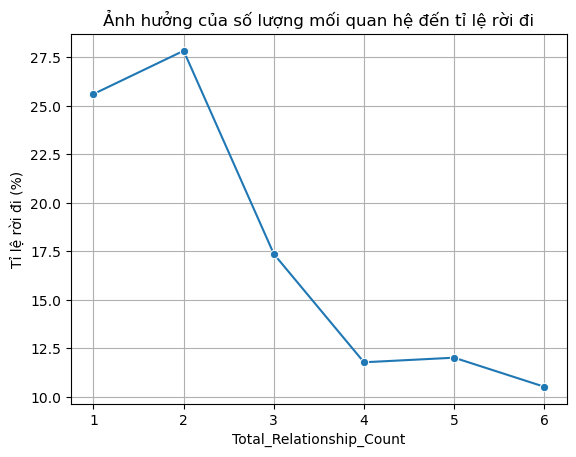

In [13]:
rel = data[:, col_idx["Total_Relationship_Count"]].astype(int)
label = data[:, col_idx["Attrition_Flag"]]

levels = np.unique(rel)
rates = []

for lv in levels:
    mask = rel == lv
    total = mask.sum()
    churn = np.logical_and(mask, label == "Attrited Customer").sum()
    rate = churn / total
    rates.append(rate)
    print(f"{lv} mối quan hệ: {rate*100:.2f}% rời đi")

sns.lineplot(x=levels, y=np.array(rates)*100, marker="o")
plt.xlabel("Total_Relationship_Count")
plt.ylabel("Tỉ lệ rời đi (%)")
plt.title("Ảnh hưởng của số lượng mối quan hệ đến tỉ lệ rời đi")
plt.grid(True)
plt.show()

**Nhận xét:**

- Với 1–2 mối quan hệ, tỉ lệ rời đi khá cao (~26–28%), cho thấy khách chỉ dùng ít sản phẩm/dịch vụ dễ rời đi hơn.
- Khi số mối quan hệ tăng từ 3 trở lên, tỉ lệ rời đi giảm rõ rệt (xuống còn 10–17%) và thấp nhất ở nhóm 6 mối quan hệ (10.5%).  
- Vậy khách càng gắn bó với nhiều sản phẩm/dịch vụ của ngân hàng thì càng ít có xu hướng rời đi.


### Q9. Mối quan hệ giữa Total_Ct_Chng_Q4_Q1 và tỉ lệ rời đi

Câu hỏi:
> Khách có tốc độ thay đổi số lượng giao dịch (Q4 vs Q1) thấp có khả năng rời đi cao hơn không?


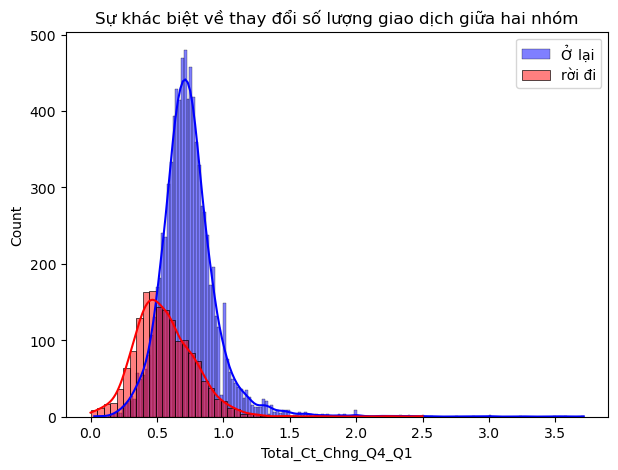

In [14]:
chg = data[:, col_idx["Total_Ct_Chng_Q4_Q1"]].astype(float)
label = data[:, col_idx["Attrition_Flag"]]

plt.figure(figsize=(7,5))
sns.histplot(chg[label=="Existing Customer"], color="blue", label="Ở lại", kde=True)
sns.histplot(chg[label=="Attrited Customer"], color="red", label="rời đi", kde=True)
plt.legend()
plt.xlabel("Total_Ct_Chng_Q4_Q1")
plt.title("Sự khác biệt về thay đổi số lượng giao dịch giữa hai nhóm")
plt.show()

**Nhận xét:**

- Phân phối của nhóm rời đi (đỏ) tập trung nhiều ở giá trị Total_Ct_Chng_Q4_Q1 thấp hơn (khoảng ~0.3–0.6).  
- Nhóm Ở lại (xanh) dịch sang bên phải, có nhiều khách có mức thay đổi giao dịch cao hơn (thậm chí > 1).

→ Khách hàng giảm hoặc ít tăng số lượng giao dịch qua thời gian có xu hướng rời đi nhiều hơn, trong khi những khách có sự tăng trưởng về số lượng giao dịch thì giữ lại tốt hơn.


### Q10. Ảnh hưởng của số tháng không hoạt động trong 12 tháng gần nhất

Câu hỏi:
> Khách không hoạt động thường xuyên (nhiều tháng không giao dịch) có tỉ lệ rời đi cao hơn không?


0 tháng không hoạt động: 51.72% rời đi
1 tháng không hoạt động: 4.48% rời đi
2 tháng không hoạt động: 15.39% rời đi
3 tháng không hoạt động: 21.48% rời đi
4 tháng không hoạt động: 29.89% rời đi
5 tháng không hoạt động: 17.98% rời đi
6 tháng không hoạt động: 15.32% rời đi


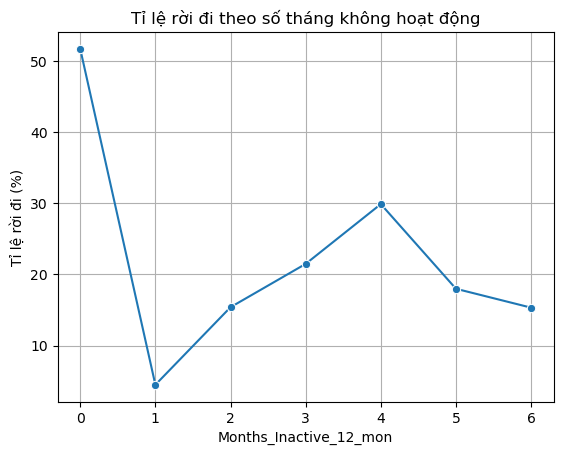

In [16]:
inactive = data[:, col_idx["Months_Inactive_12_mon"]].astype(int)
label    = data[:, col_idx["Attrition_Flag"]]

levels = np.unique(inactive)
rates = []

for lv in levels:
    mask = inactive == lv
    total = mask.sum()
    churn = np.logical_and(mask, label=="Attrited Customer").sum()
    rate = churn / total
    rates.append(rate)
    print(f"{lv} tháng không hoạt động: {rate*100:.2f}% rời đi")

sns.lineplot(x=levels, y=np.array(rates)*100, marker="o")
plt.ylabel("Tỉ lệ rời đi (%)")
plt.xlabel("Months_Inactive_12_mon")
plt.title("Tỉ lệ rời đi theo số tháng không hoạt động")
plt.grid(True)
plt.show()

**Nhận xét:**

- Nhóm 1 tháng không hoạt động có tỉ lệ rời đi rất thấp (~4.5%), sau đó tỉ lệ rời đi tăng dần từ 2 → 4 tháng và đạt khoảng 30% ở 4 tháng inactive → khách bỏ dùng thẻ liên tiếp vài tháng là nhóm rủi ro rời đi cao.
- Từ 5–6 tháng, tỉ lệ rời đi giảm nhẹ còn ~15–18%, cho thấy xu hướng không hoàn toàn tuyến tính theo số tháng không hoạt động.
- Nhóm 0 tháng không hoạt động có tỉ lệ rời đi rất cao (~52%).


## Tổng kết

Qua các biểu đồ ở trên, có thể rút ra một số điểm chính:

- Dữ liệu tỉ lệ rời đi bị lệch lớp: chỉ khoảng 16% khách rời đi → khi làm mô hình cần chú ý đến class imbalance (không nên chỉ nhìn accuracy, nên dùng thêm F1, ROC-AUC, hoặc class_weight,…).

- Thông tin nhân khẩu học (tuổi, giới tính, thu nhập) có khác biệt tỉ lệ rời đi nhưng không quá mạnh. Tập khách hàng chủ yếu là trung niên, nữ và hai đầu thu nhập có tỉ lệ churn cao hơn một chút.

- Hành vi sử dụng thẻ/giao dịch là yếu tố nổi bật nhất:  
  - Khách giao dịch ít có tỉ lệ rời đi cao, trong khi nhóm giao dịch nhiều gần như không rời đi.  
  - Khi số lượng giao dịch không tăng hoặc giảm theo thời gian, rủi ro rời đi cũng cao hơn.

- Mức độ gắn bó với ngân hàng cũng ảnh hưởng rõ rệt:  
  - Khách chỉ có 1–2 mối quan hệ với ngân hàng có tỉ lệ rời đi cao,  
  - Khách có 3–6 mối quan hệ rời đi thấp hơn đáng kể.

- Hạn mức tín dụng và mức sử dụng hạn mức:  
  - Nhóm rời đi thường có hạn mức thấp hơn nhóm còn hoạt động.  
  - Các biến như `Credit_Limit`, `Avg_Utilization_Ratio`, `Total_Revolving_Bal` có mối quan hệ hợp lý và nên được giữ lại cho bước modeling.

- Ma trận tương quan cho thấy đa số đặc trưng số không tương quan quá cao, ngoại trừ một vài cặp như `Total_Trans_Ct`–`Total_Trans_Amt`, `Total_Revolving_Bal`–`Avg_Utilization_Ratio`. Điều này cho phép giữ lại khá nhiều biến để mô hình khai thác các quan hệ phi tuyến.

Tóm lại, bước EDA giúp xác định được:
- Những nhóm đặc trưng liên quan mạnh đến tỉ lệ rời đi (giao dịch, số sản phẩm, inactive, hạn mức),  
- Định hướng cho bước tiền xử lý (chọn/biến đổi đặc trưng, xử lý mất cân bằng dữ liệu),  
- Tạo nền tảng cho giai đoạn xây dựng mô hình dự đoán tỉ lệ rời đi ở phần tiếp theo.
